In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12 00:00:00,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12 00:00:00,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12 00:00:00,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(蚓)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(蚓)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [5]:
df['Holiday'].value_counts(dropna=False)

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [6]:
df['Seasons'].value_counts(dropna=False)

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df[(df['Hour'] >= 8) & (df['Hour'] <= 17)]

,Date,Rented Bike Count,Hour,Temperature(蚓),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(蚓),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8,2017-01-12 00:00:00,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,2017-01-12 00:00:00,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes
10,2017-01-12 00:00:00,339,10,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Winter,No Holiday,Yes
11,2017-01-12 00:00:00,360,11,-0.5,21,1.3,1936,-20.2,0.94,0.0,0.0,Winter,No Holiday,Yes
12,2017-01-12 00:00:00,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8749,30/11/2018,740,13,7.1,24,2.8,1838,-12.1,1.83,0.0,0.0,Autumn,No Holiday,Yes
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes
8751,30/11/2018,768,15,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,Autumn,No Holiday,Yes
8752,30/11/2018,837,16,7.2,23,1.5,1945,-12.6,0.72,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df[(df['Hour'] >= 8) & (df['Hour'] <= 17)]['Rented Bike Count'].describe()

count    3650.000000
mean      788.018904
std       563.400234
min         0.000000
25%       306.250000
50%       723.000000
75%      1116.000000
max      2664.000000
Name: Rented Bike Count, dtype: float64

In [10]:
df.isna().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(蚓)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(蚓)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [11]:
# Keep only working hours and functioning days
# If maintenance is possible in non-functioning days, it can be performed at
# will, no need to check for the least busy hour
__df = df.copy()[(df['Hour'] >= 8) & (df['Hour'] <= 17) & (df['Functioning Day'] == 'Yes')]

In [12]:
__df.groupby('Hour')['Rented Bike Count'].mean()

Hour
8     1050.229462
9      667.943343
10     545.764873
11     621.277620
12     723.218130
13     758.172805
14     784.620397
15     857.373938
16     962.257790
17    1177.212465
Name: Rented Bike Count, dtype: float64

In [13]:
__df.groupby('Hour')['Rented Bike Count'].std()

Hour
8     750.622776
9     386.816130
10    313.167195
11    350.359753
12    417.871073
13    444.636651
14    476.262178
15    533.456207
16    603.687780
17    730.994822
Name: Rented Bike Count, dtype: float64

In [14]:
__df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean()

Seasons  Hour
Autumn   8       1345.037037
         9        848.432099
         10       715.271605
         11       802.950617
         12       934.641975
         13      1002.666667
         14      1058.827160
         15      1156.703704
         16      1293.209877
         17      1562.876543
Spring   8       1036.377778
         9        670.388889
         10       570.888889
         11       681.466667
         12       836.377778
         13       886.088889
         14       925.666667
         15       990.977778
         16      1101.455556
         17      1307.977778
Summer   8       1418.597826
         9        911.000000
         10       723.500000
         11       786.858696
         12       875.967391
         13       890.195652
         14       894.673913
         15      1009.717391
         16      1174.173913
         17      1526.293478
Winter   8        422.200000
         9        254.600000
         10       186.400000
         11       228.322222


In [15]:
import seaborn as sns
sns.set_theme(style="darkgrid")
colorblind_palette = sns.color_palette("colorblind")

In [16]:
# show current sns colors
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [17]:
sns.color_palette().as_hex()[0:4]

['#4c72b0', '#dd8452', '#55a868', '#c44e52']

In [18]:
values = sns.color_palette().as_hex()[0:4]
keys = ['Winter', 'Autumn', 'Spring', 'Summer']

season_colors = dict(zip(keys, values))

In [19]:
sns.color_palette("colorblind")

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [20]:
values = sns.color_palette('colorblind').as_hex()[0:4]
keys = ['Winter', 'Autumn', 'Spring', 'Summer']

colorblind_colors = dict(zip(keys, values))

In [21]:
ordered_seasons = ['Autumn', 'Winter', 'Spring', 'Summer']

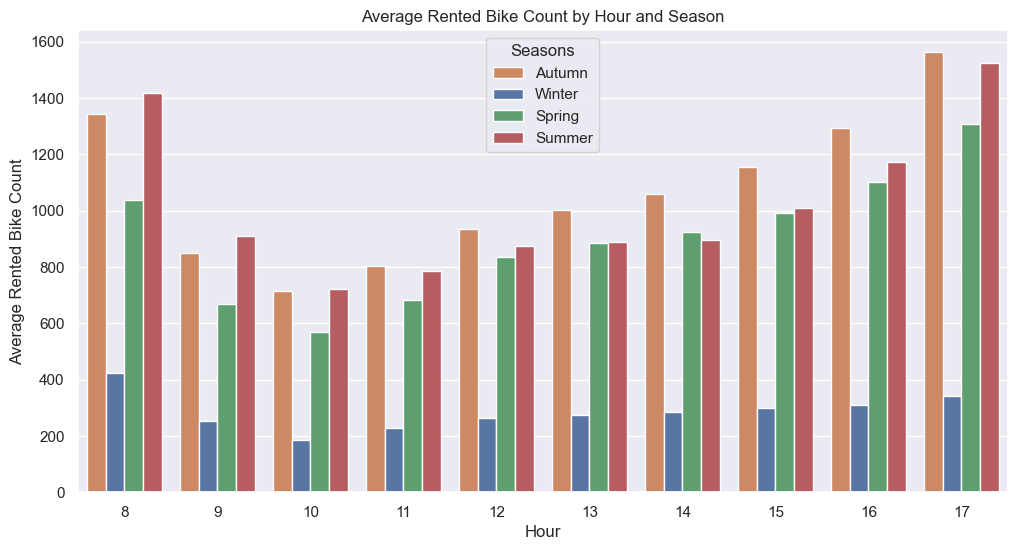

In [22]:
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='Hour',
            y='Rented Bike Count',
            data=viz_df,
            hue='Seasons',
            color='Seasons',
            palette=season_colors,
            ax=ax
            )

ax.set_title('Average Rented Bike Count by Hour and Season')
ax.set_ylabel('Average Rented Bike Count')
plt.show()

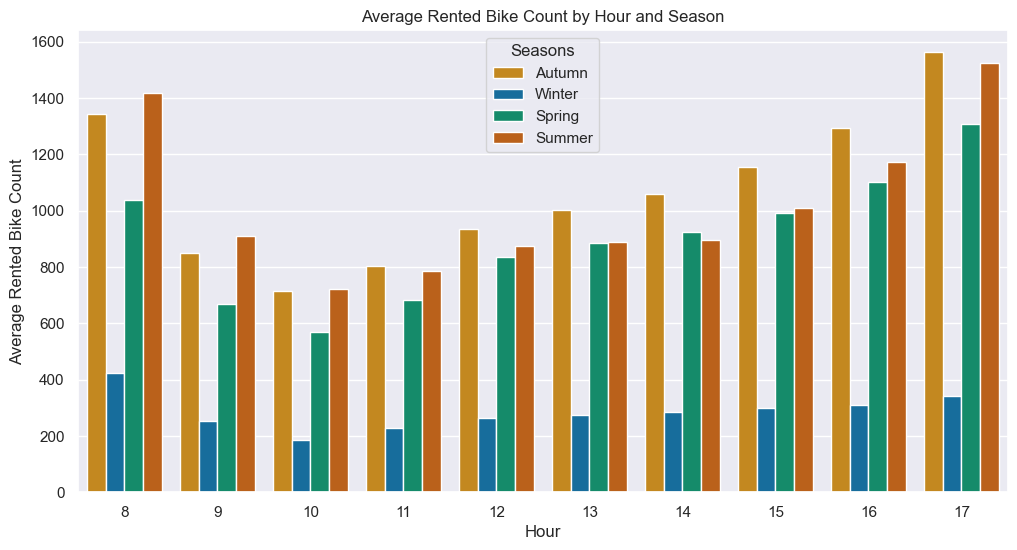

In [23]:
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='Hour',
            y='Rented Bike Count',
            data=viz_df,
            hue='Seasons',
            color='Seasons',
            palette=colorblind_colors,
            ax=ax
            )

ax.set_title('Average Rented Bike Count by Hour and Season')
ax.set_ylabel('Average Rented Bike Count')
plt.show()

Some questions to answer:
 1. How long does maintenance take? Should I find a window of more than 3 hours?
 2. Does the above change if we exclude holidays?

In [33]:
df['Holiday'].value_counts(dropna=False)

Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

In [34]:
__df = df.copy()[(df['Hour'] >= 8) & (df['Hour'] <= 17) & (df['Functioning Day'] == 'Yes') & (df['Holiday'] == 'No Holiday')]

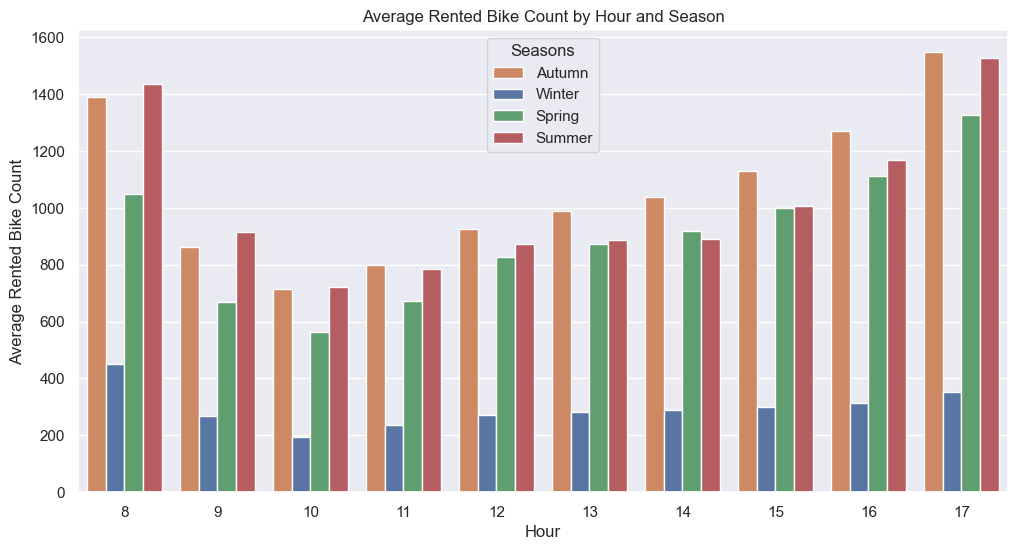

In [35]:
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='Hour',
            y='Rented Bike Count',
            data=viz_df,
            hue='Seasons',
            color='Seasons',
            palette=season_colors,
            ax=ax
            )

ax.set_title('Average Rented Bike Count by Hour and Season')
ax.set_ylabel('Average Rented Bike Count')
plt.show()

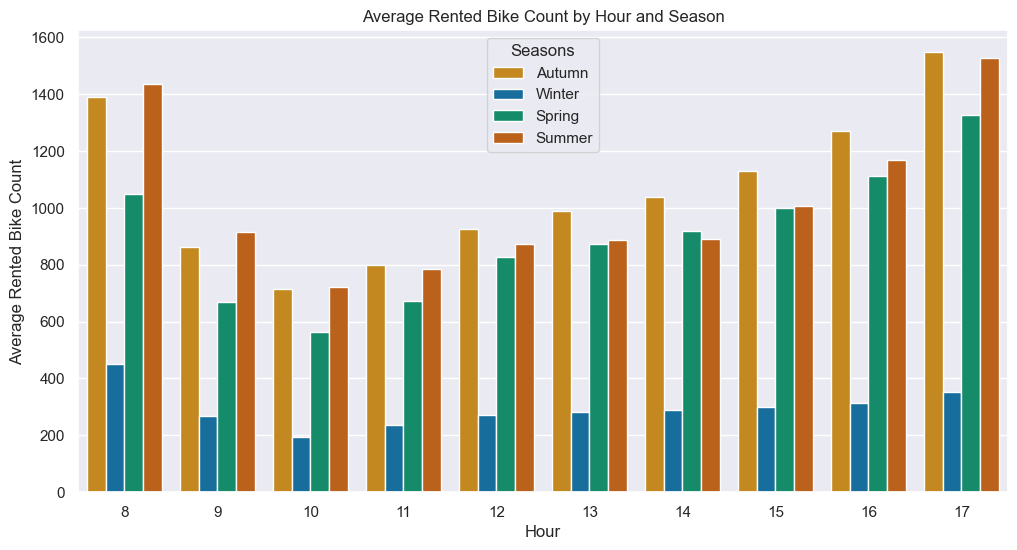

In [36]:
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)

fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x='Hour',
            y='Rented Bike Count',
            data=viz_df,
            hue='Seasons',
            color='Seasons',
            palette=colorblind_colors,
            ax=ax
            )

ax.set_title('Average Rented Bike Count by Hour and Season')
ax.set_ylabel('Average Rented Bike Count')
plt.show()

In [57]:
cmap = plt.cm.Oranges

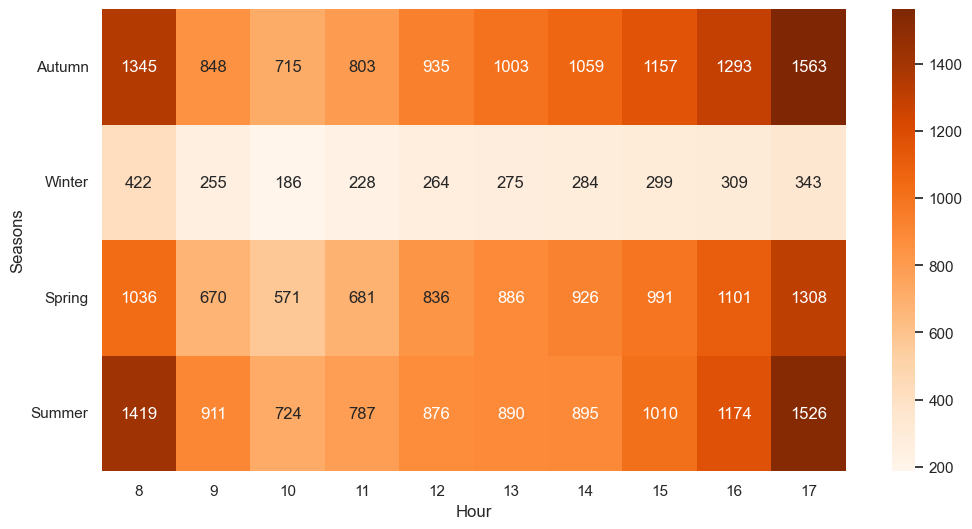

In [58]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)

# two axes
fig, ax = plt.subplots(figsize=(12, 6))

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count'),
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax
            )

ax.yaxis.set_tick_params(rotation=0)

In [59]:
# Returns the x coordinates of a text element on a given axis of a given
# figure.
# Used to position elements on the canvas
# Returns object with attributes:
#   x0 coordinate of the text element
#   x1 coordinate of the text element
#   y0 coordinate of the text element
#   y1 coordinate of the text element
def get_text_coordinates(text_element, ax, fig):
        x0 = text_element.get_window_extent(fig.canvas.get_renderer()).x0
        x1 = text_element.get_window_extent(fig.canvas.get_renderer()).x1
        y0 = text_element.get_window_extent(fig.canvas.get_renderer()).y0
        y1 = text_element.get_window_extent(fig.canvas.get_renderer()).y1
        return {
                 'x0': round(ax.transData.inverted().transform_point((x0, 0))[0], 2),
                 'x1': round(ax.transData.inverted().transform_point((x1, 0))[0], 2),
                 'y0': round(ax.transData.inverted().transform_point((0, y0))[1], 2),
                 'y1': round(ax.transData.inverted().transform_point((0, y1))[1], 2)
               }

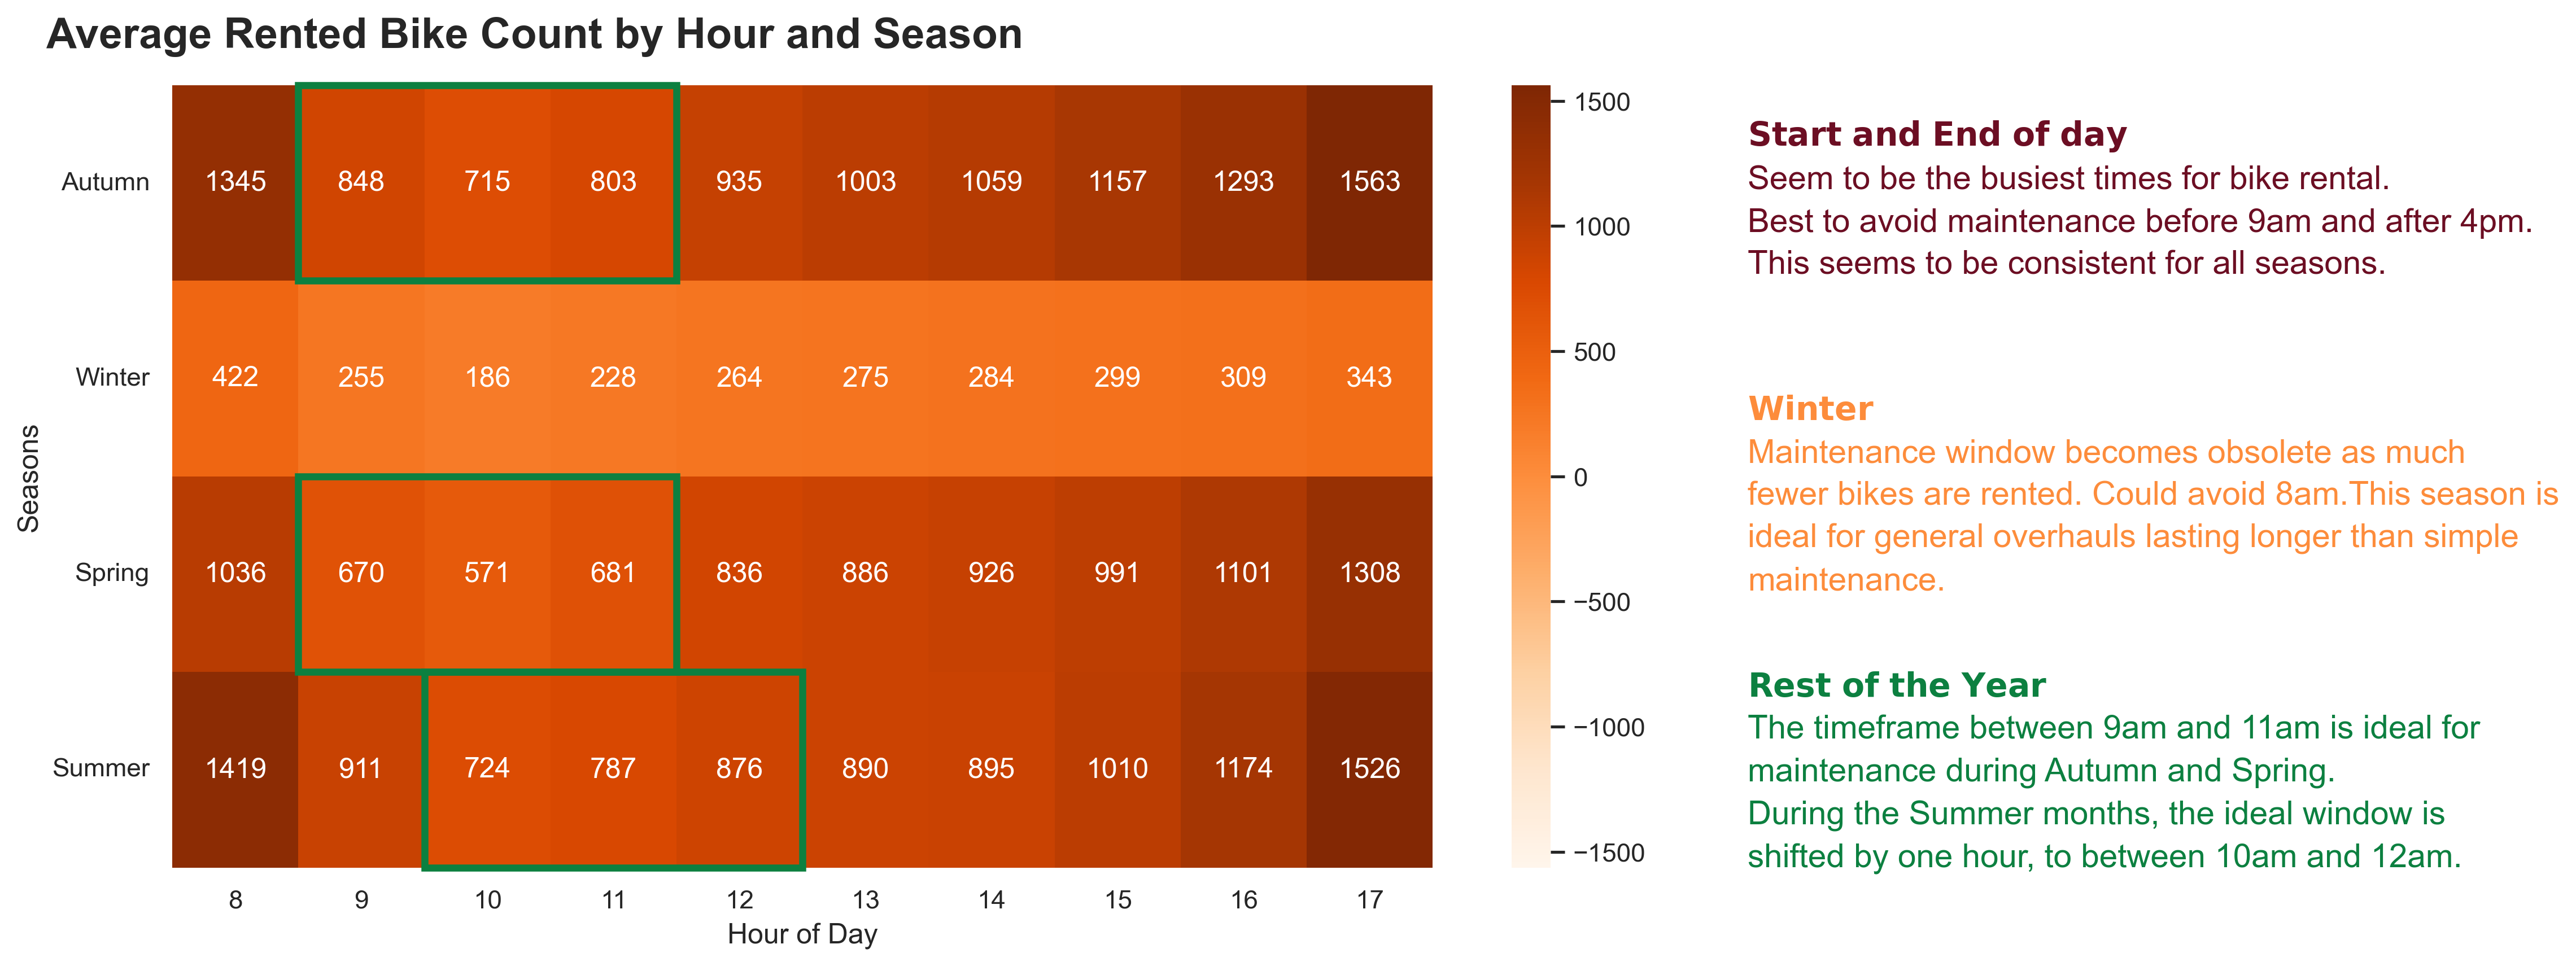

In [77]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)
viz_df['Rented Bike Count'] = viz_df['Rented Bike Count'].round(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6), dpi=300)


vmin=viz_df['Rented Bike Count'].max() * -1
# Using a larger maximum to avoid having annotations with black color, which we cannot so easily fade out of the viewers attention
# vmax=viz_df['Rented Bike Count'].max() * 1.40
vmax=viz_df['Rented Bike Count'].max()

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count'),
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            vmin=vmin,
            vmax=vmax
            )

ax.yaxis.set_tick_params(rotation=0)
ax.set_xlabel('Hour of Day')

rectangles_color = '#0C8040'

rect_options = {
  'width': 3,
  'height': 1,
  'fill': False,
  'edgecolor': rectangles_color,
  'lw': 3,
  'clip_on': False
}

# add a rectangle
rect1 = plt.Rectangle(xy=(1, 0), **rect_options)
ax.add_patch(rect1)

rect2 = plt.Rectangle(xy=(1, 2), **rect_options)
ax.add_patch(rect2)

rect3 = plt.Rectangle(xy=(2, 3), **rect_options)
ax.add_patch(rect3)

# Side texts
text_options = {
  'x': 0,
  'y': 0,
  'ha': 'left',
  'va': 'bottom',
  'fontsize': 14,
  'linespacing': 1.5
}

side_texts_height = 0

t1 = ax.text(
  s='$\\bf{Start\\ and\\ End\\ of\\ day}$\nSeem to be the busiest times for bike rental.\nBest to avoid maintenance before 9am and after 4pm.\nThis seems to be consistent for all seasons.',
  # color='#F79747',
  color='#6C0E23',
  **text_options
  )

side_texts_height += get_text_coordinates(t1, ax=ax, fig=fig)['y1']

t2 = ax.text(
  s='$\\bf{Winter}$\nMaintenance window becomes obsolete as much\nfewer bikes are rented. Could avoid 8am.This season is\nideal for general overhauls lasting longer than simple\nmaintenance.',
  color=cmap(0.5),
  **text_options
  )

side_texts_height += get_text_coordinates(t2, ax=ax, fig=fig)['y1']

t3 = ax.text(
  s='$\\bf{Rest\\ of\\ the\\ Year}$\nThe timeframe between 9am and 11am is ideal for\nmaintenance during Autumn and Spring.\nDuring the Summer months, the ideal window is\nshifted by one hour, to between 10am and 12am.',
  color=rectangles_color,
  **text_options
  )

side_texts_height += get_text_coordinates(t3, ax=ax, fig=fig)['y1']

# side_texts_start_y0 = 0.7
side_texts_start_y0 = 1
# side_texts_start_y0 = 1.7
# side_texts_start_y0 = 1.2
side_texts_end_y1 = 3

spacing = (side_texts_end_y1 - side_texts_start_y0 - side_texts_height) / (3 - 1) # n_elements - 1

side_box_x = 12.5

# t1.set_position((side_box_x, side_texts_start_y0 + spacing))
t1.set_position((side_box_x, side_texts_start_y0))

y1 = get_text_coordinates(t1, ax=ax, fig=fig)['y1'] + spacing

t2.set_position((side_box_x, y1))

y2 = get_text_coordinates(t2, ax=ax, fig=fig)['y1'] + spacing

t3.set_position((side_box_x, y2))

title = ax.text(
  x=-1,
  y=-0.35,
  s='Average Rented Bike Count by Hour and Season',
  fontsize=18,
  ha='left',
  va='top',
  weight='bold'
)

plt.show()

The above can be included in the written report.
<br />
The following will be included in the presentation.

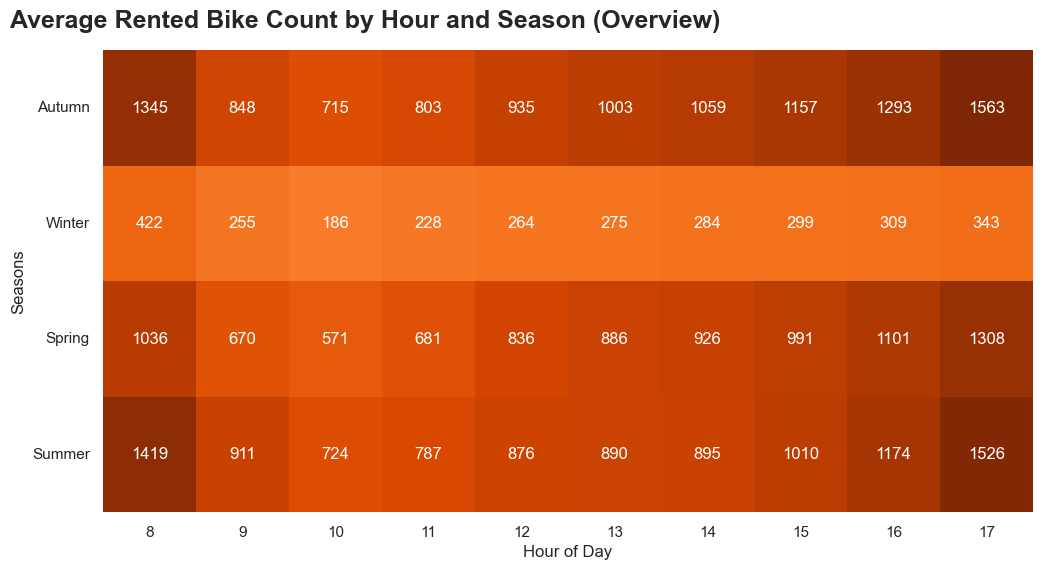

In [62]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)
viz_df['Rented Bike Count'] = viz_df['Rented Bike Count'].round(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

data = viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count')

# vmin=viz_df['Rented Bike Count'].min()
vmin=viz_df['Rented Bike Count'].max() * -1
# Using a larger maximum to avoid having annotations with black color, which we cannot so easily fade out of the viewers attention
# vmax=viz_df['Rented Bike Count'].max() * 1.40
vmax=viz_df['Rented Bike Count'].max()

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(data,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            cbar=False,
            vmin=vmin,
            vmax=vmax
            )

title = ax.text(
  x=-1,
  y=-0.35,
  s='Average Rented Bike Count by Hour and Season (Overview)',
  fontsize=18,
  ha='left',
  va='top',
  weight='bold'
)

ax.yaxis.set_tick_params(rotation=0)
ax.set_xlabel('Hour of Day')

# remove gray grid
ax.grid(False)

### Peak times

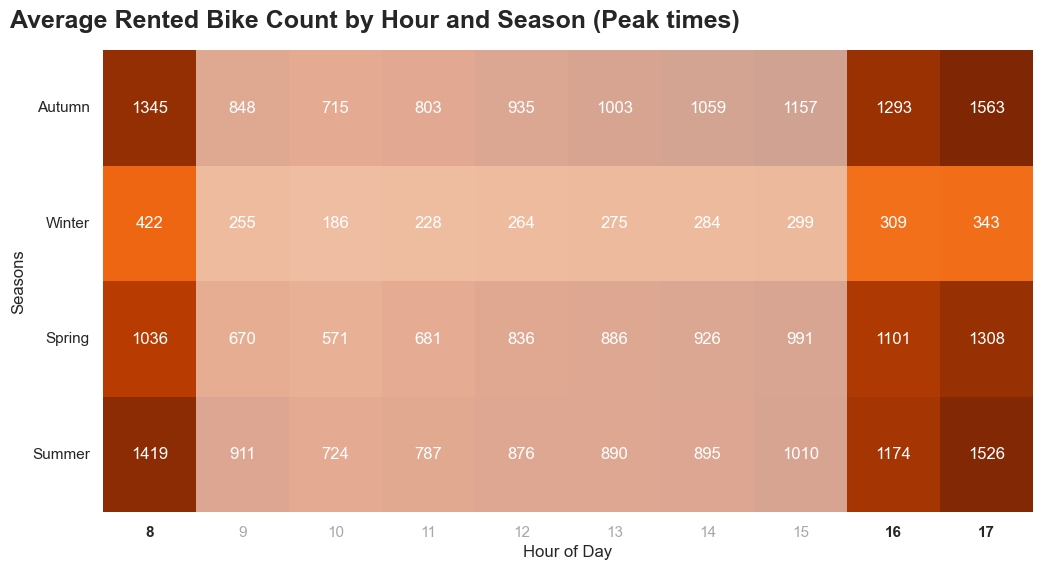

In [69]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)
viz_df['Rented Bike Count'] = viz_df['Rented Bike Count'].round(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

data = viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count')

mask = np.zeros_like(data, dtype=bool)
alpha = 0.4
vmin=viz_df['Rented Bike Count'].min()
vmin=viz_df['Rented Bike Count'].max() * -1
# Using a larger maximum to avoid having annotations with black color, which we cannot so easily fade out of the viewers attention
# vmax=viz_df['Rented Bike Count'].max() * 1.40
vmax=viz_df['Rented Bike Count'].max()


highlight_coords = list(itertools.product(
            list(range(0,4)),
            [0] + list(range(len(viz_df['Hour'].unique()) - 2, len(viz_df['Hour'].unique())))
            ))

for coord in highlight_coords:
    mask[coord] = True

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(data,
            mask=mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            alpha=alpha,
            cbar=False,
            vmin=vmin,
            vmax=vmax
            )

title = ax.text(
  x=-1,
  y=-0.35,
  s='Average Rented Bike Count by Hour and Season (Peak times)',
  fontsize=18,
  ha='left',
  va='top',
  weight='bold'
)

# decrease opacity of the x-axis labels
for label in ax.get_xticklabels():
    if label.get_text() in ['8', '16', '17']:
      # make bold
      label.set_weight('bold')
      continue

    label.set_alpha(alpha)

mask = np.zeros_like(data, dtype=bool)

for coord in highlight_coords:
    mask[coord] = True

sns.heatmap(data,
            mask=~mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            cbar=False,
            # alpha=1,
            vmin=vmin,
            vmax=vmax
            )

ax.yaxis.set_tick_params(rotation=0)
ax.set_xlabel('Hour of Day')

# remove gray grid
ax.grid(False)

### Winter

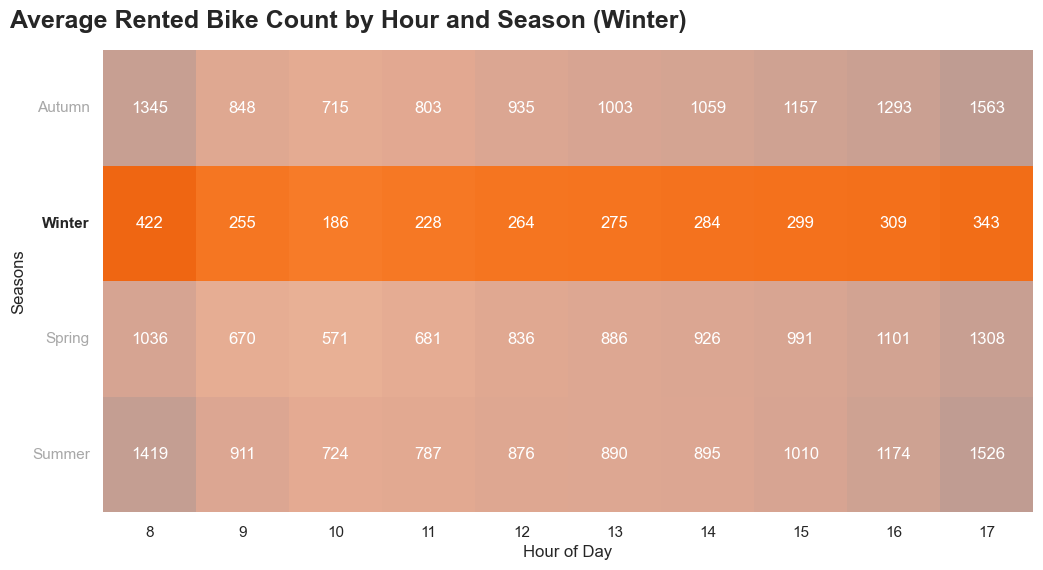

In [70]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)
viz_df['Rented Bike Count'] = viz_df['Rented Bike Count'].round(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

data = viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count')

mask = np.zeros_like(data, dtype=bool)
alpha = 0.4

highlight_coords = list(itertools.product(
            [1],
            range(0, len(viz_df['Hour'].unique())
            )))

for coord in highlight_coords:
    mask[coord] = True

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(data,
            mask=mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            alpha=alpha,
            cbar=False,
            vmin=vmin,
            vmax=vmax
            )

title = ax.text(
  x=-1,
  y=-0.35,
  s='Average Rented Bike Count by Hour and Season (Winter)',
  fontsize=18,
  ha='left',
  va='top',
  weight='bold'
)

mask = np.zeros_like(data, dtype=bool)

for coord in highlight_coords:
    mask[coord] = True

sns.heatmap(data,
            mask=~mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            cbar=False,
            # alpha=1,
            vmin=vmin,
            vmax=vmax
            )

ax.yaxis.set_tick_params(rotation=0)
ax.set_xlabel('Hour of Day')

for label in ax.get_yticklabels():
    if label.get_text() in ['Winter']:
      # make bold
      label.set_weight('bold')
      continue

    # Need it to be a little more transparent
    label.set_alpha(alpha)

# remove gray grid
ax.grid(False)

### Autumn and Spring

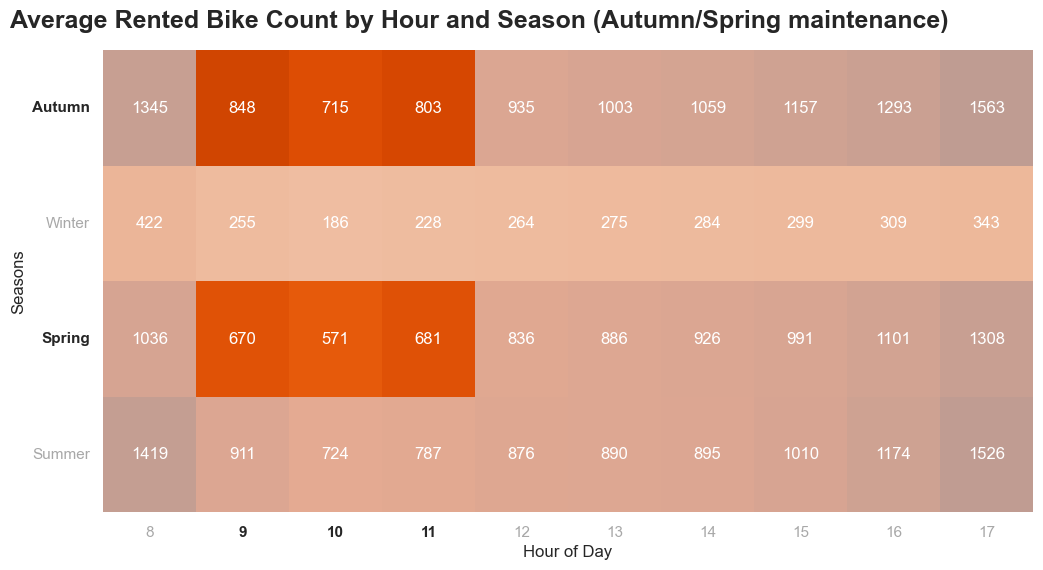

In [73]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)
viz_df['Rented Bike Count'] = viz_df['Rented Bike Count'].round(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

data = viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count')

mask = np.zeros_like(data, dtype=bool)
alpha = 0.4

# highlight_coords = [(1, 0), (1, 2), (2, 3)]
highlight_coords = list(itertools.product(
            [0, 2],
            [1, 2, 3]
            ))

for coord in highlight_coords:
    mask[coord] = True

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(data,
            mask=mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            alpha=alpha,
            cbar=False,
            vmin=vmin,
            vmax=vmax
            )

title = ax.text(
  x=-1,
  y=-0.35,
  s='Average Rented Bike Count by Hour and Season (Autumn/Spring maintenance)',
  fontsize=18,
  ha='left',
  va='top',
  weight='bold'
)

# decrease opacity of the x-axis labels
for label in ax.get_xticklabels():
    if label.get_text() in ['9', '10', '11']:
      # make bold
      label.set_weight('bold')
      continue

    label.set_alpha(alpha)

mask = np.zeros_like(data, dtype=bool)

for coord in highlight_coords:
    mask[coord] = True

sns.heatmap(data,
            mask=~mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            cbar=False,
            # alpha=1,
            vmin=vmin,
            vmax=vmax
            )

ax.yaxis.set_tick_params(rotation=0)
ax.set_xlabel('Hour of Day')

for label in ax.get_yticklabels():
    if label.get_text() in ['Autumn', 'Spring']:
      # make bold
      label.set_weight('bold')
      continue

    label.set_alpha(alpha)

# remove gray grid
ax.grid(False)

### Summer

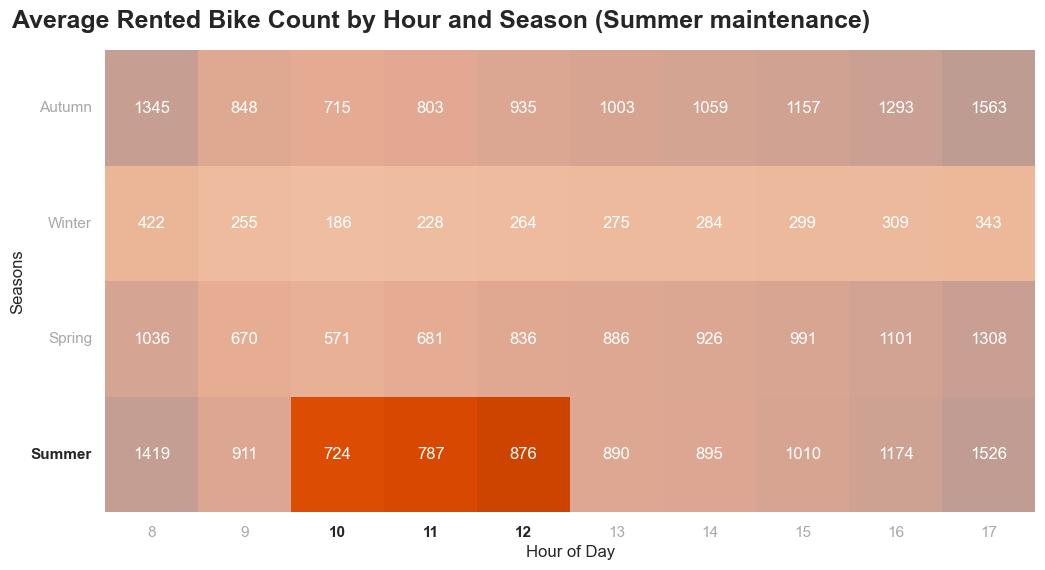

In [75]:
# a heatmap of the average rented bike count by hour and season
viz_df = __df.groupby(['Seasons', 'Hour'])['Rented Bike Count'].mean().reset_index()
viz_df['Seasons'] = pd.Categorical(viz_df['Seasons'], categories=ordered_seasons, ordered=True)
viz_df['Rented Bike Count'] = viz_df['Rented Bike Count'].round(0).astype(int)

fig, ax = plt.subplots(figsize=(12, 6))

data = viz_df.pivot(index='Seasons', columns='Hour', values='Rented Bike Count')

mask = np.zeros_like(data, dtype=bool)

# highlight_coords = [(1, 0), (1, 2), (2, 3)]
highlight_coords = list(itertools.product(
            [3],
            [2, 3, 4]
            ))

for coord in highlight_coords:
    mask[coord] = True

# a heatmap of the average rented bike count, with x = hour and y = season
sns.heatmap(data,
            mask=mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            alpha=alpha,
            cbar=False,
            vmin=vmin,
            vmax=vmax
            )

title = ax.text(
  x=-1,
  y=-0.35,
  s='Average Rented Bike Count by Hour and Season (Summer maintenance)',
  fontsize=18,
  ha='left',
  va='top',
  weight='bold'
)

# decrease opacity of the x-axis labels
for label in ax.get_xticklabels():
    if label.get_text() in ['10', '11', '12']:
      # make bold
      label.set_weight('bold')
      continue

    label.set_alpha(alpha)

mask = np.zeros_like(data, dtype=bool)

for coord in highlight_coords:
    mask[coord] = True

sns.heatmap(data,
            mask=~mask,
            annot=True,
            fmt='.0f',
            cmap=cmap,
            ax=ax,
            cbar=False,
            # alpha=1,
            vmin=vmin,
            vmax=vmax
            )

ax.yaxis.set_tick_params(rotation=0)
ax.set_xlabel('Hour of Day')

for label in ax.get_yticklabels():
    if label.get_text() in ['Summer']:
      # make bold
      label.set_weight('bold')
      continue

    label.set_alpha(alpha)

# remove gray grid
ax.grid(False)